In [1]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline

# Dimensionality Reduction in Linear Regression

Use the cell below to create new partial least square regressions with different numbers of components, then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression.  Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

## From Example 

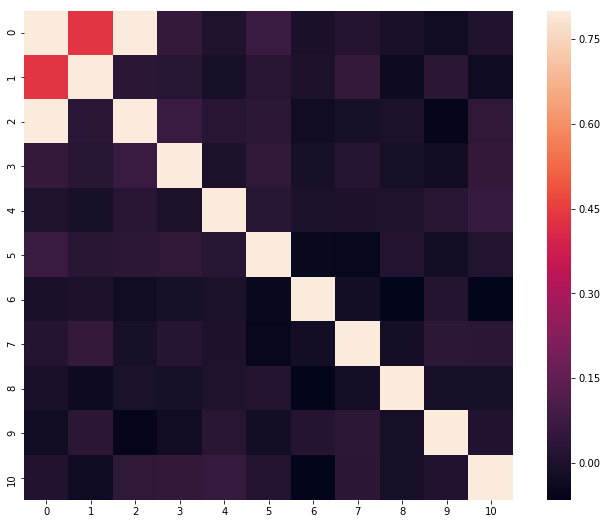

In [2]:
#number of datapoints in outcome
n = 1000

#number of features
p = 10

#create random normally distributed data for parameters
X = np.random.normal(size=n*p).reshape((n, p))

#create normally distributed outcome related to parameters but with noise
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

#check out correlations. First column is the outcome
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

#draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8498179657792847
R-squared PLSR: 0.8498176574907522


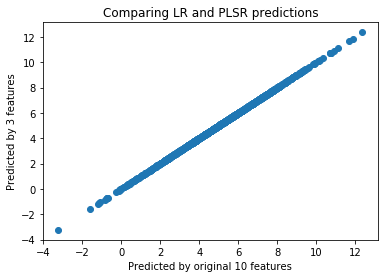

In [3]:
#fit a linear model with all 10 features
regr = linear_model.LinearRegression()
regr.fit(X, y)

#save predicted values
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

#fit a linear model using Partial Least Squares Regression
#reduce feature space to 3 dimensions
pls1 = PLSRegression(n_components=3)

#reduce X to R(X) and regress on y
pls1.fit(X, y)

#save predicted values
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

#compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

## Changing number of Components

R-squared PLSR: 0.8498179657717225


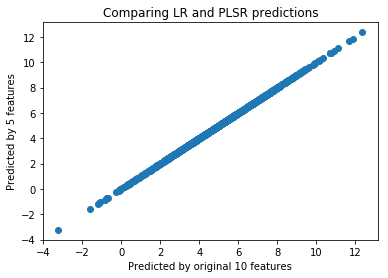

In [6]:
#fit a linear model using Partial Least Squares Regression
#reduce feature space to 5 dimensions
pls1 = PLSRegression(n_components=5)

#reduce X to R(X) and regress on y
pls1.fit(X, y)

#save predicted values
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

#compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.8497699705814955


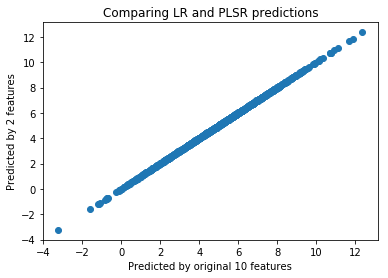

In [7]:
# Reduce feature space to 2 dimensions.
pls1 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.8407437735869608


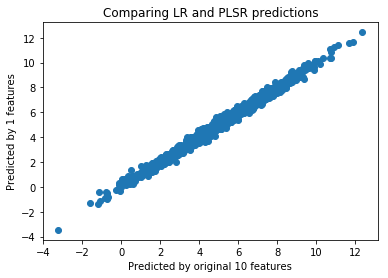

In [9]:
# Reduce feature space to 1 dimensions.
pls1 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 1 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared is more off when we reduce component to 1.